# Machine Learning Basics in Python

This notebook introduces the foundational concepts of machine learning (ML) using Python. You'll learn about supervised and unsupervised learning, model training, evaluation, and practical applications using scikit-learn.

## Topics Covered:
1. What is Machine Learning?
2. Types of Machine Learning
3. The Machine Learning Workflow
4. Data Preparation
5. Supervised Learning: Classification
6. Supervised Learning: Regression
7. Unsupervised Learning: Clustering
8. Model Evaluation and Metrics
9. Real-Life Use Cases

## 1. What is Machine Learning?

Machine learning is a field of artificial intelligence that enables computers to learn from data and make predictions or decisions without being explicitly programmed for each task.

**Real-life use case:** Email spam filters use machine learning to classify emails as spam or not spam based on patterns in the data.

## 2. Types of Machine Learning

- **Supervised Learning:** The model learns from labeled data (e.g., classification, regression).
- **Unsupervised Learning:** The model finds patterns in unlabeled data (e.g., clustering, dimensionality reduction).
- **Reinforcement Learning:** The model learns by interacting with an environment and receiving feedback (rewards or penalties).

**Real-life use case:** Customer segmentation (unsupervised) and credit scoring (supervised).

## 3. The Machine Learning Workflow

1. Define the problem
2. Collect and prepare data
3. Choose a model
4. Train the model
5. Evaluate the model
6. Tune and improve
7. Deploy and monitor

**Real-life use case:** Predicting house prices using historical sales data.

### Importing Required Libraries

**Introduction:**
Before building machine learning models, we need to import the necessary Python libraries for data handling, visualization, and modeling.

**Real-life use case:**
A data scientist always starts by importing libraries like pandas, numpy, matplotlib, seaborn, and scikit-learn to prepare for any ML project.

**What the code does:**
The next code cell imports all the essential libraries for this notebook.

In [ ]:
# Import required libraries
import numpy as np            # For numerical operations and array handling
import pandas as pd           # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns        # For statistical visualizations

# Scikit-learn imports
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.datasets import load_iris, make_blobs, fetch_california_housing  # Example datasets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix  # For model evaluation
from sklearn.linear_model import LogisticRegression, LinearRegression  # Common ML models
from sklearn.tree import DecisionTreeClassifier  # Decision tree algorithm
from sklearn.cluster import KMeans  # Clustering algorithm

# No visible output for this cell, but it sets up our ML environment

### Loading and Exploring the Iris Dataset

**Introduction:**
A common first step in ML is to load a dataset and explore its structure. The Iris dataset is a classic for classification tasks.

**Real-life use case:**
A beginner data scientist uses the Iris dataset to practice classification and data exploration techniques.

**What the code does:**
The next code cell loads the Iris dataset and displays the first few rows.

In [ ]:
# Load the Iris dataset as a pandas DataFrame
iris = load_iris(as_frame=True)  # Load the famous iris flower dataset with pandas DataFrame
# Get the DataFrame with features and target
df = iris.frame
# Show the first 5 rows
print(df.head())

# Output (example):
#    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
# 0                5.1               3.5                1.4               0.2       0
# 1                4.9               3.0                1.4               0.2       0
# 2                4.7               3.2                1.3               0.2       0
# 3                4.6               3.1                1.5               0.2       0
# 4                5.0               3.6                1.4               0.2       0

### Checking for Missing Values

**Introduction:**
Data quality is crucial in ML. Checking for missing values ensures the dataset is ready for modeling.

**Real-life use case:**
A data analyst checks for missing values before training a model to avoid errors and bias.

**What the code does:**
The next code cell checks if there are any missing values in the Iris dataset.

In [ ]:
# Check for missing values in the DataFrame
print('Missing values:', df.isnull().sum().sum())
# Output: Missing values: 0 (indicating the dataset is complete with no missing values)

### Feature Scaling (Standardization)

**Introduction:**
Feature scaling is important for many ML algorithms to ensure all features contribute equally.

**Real-life use case:**
Scaling features before training a model improves convergence and accuracy, especially for algorithms like logistic regression and KMeans.

**What the code does:**
The next code cell standardizes the features in the Iris dataset.

In [ ]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()  # Create the scaler
X_scaled = scaler.fit_transform(df[iris.feature_names])  # Scale the features
print('Scaled features shape:', X_scaled.shape)
# Output: Scaled features shape: (150, 4) (150 samples with 4 features)

## 4. Data Preparation

Data cleaning and preprocessing are crucial for building effective ML models. This includes handling missing values, encoding categorical variables, and feature scaling.

**Real-life use case:** Preparing customer data for churn prediction by filling missing values and normalizing features.

In [ ]:
# Example: Load and prepare the Iris dataset
iris = load_iris(as_frame=True)  # Load the famous iris flower dataset with pandas DataFrame
df = iris.frame  # Get the DataFrame with features and target
print(df.head())  # Show the first 5 rows
# Check for missing values
print('Missing values:', df.isnull().sum().sum())
# Output: Missing values: 0 (indicating the dataset is complete with no missing values)

# Feature scaling - standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()  # Create the scaler
X_scaled = scaler.fit_transform(df[iris.feature_names])  # Scale the features
print('Scaled features shape:', X_scaled.shape)
# Output: Scaled features shape: (150, 4) (150 samples with 4 features)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Missing values: 0
Scaled features shape: (150, 4)


## 5. Supervised Learning: Classification

Classification is about predicting a categorical label. Example: Predicting if an email is spam or not.

**Real-life use case:** Diagnosing diseases (e.g., predicting if a tumor is malignant or benign).

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



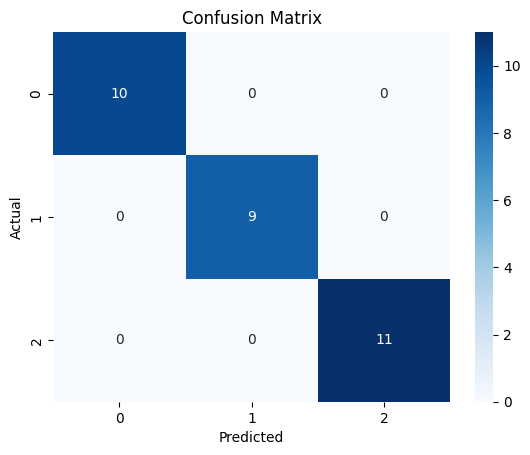

In [ ]:
# Split data into train and test sets
X = X_scaled  # Scaled feature data
y = df['target']  # Target variable (iris species)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# This creates: 
# - 80% training data (120 samples)
# - 20% testing data (30 samples) 
# - with consistent splits due to random_state=42

# Train a logistic regression classifier
clf = LogisticRegression(max_iter=200)  # Create the model with 200 max iterations
clf.fit(X_train, y_train)  # Train the model on the training data
y_pred = clf.predict(X_test)  # Make predictions on the test data

# Evaluate the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
# Output (example): Accuracy: 0.9667 (96.67% of predictions are correct)

print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 6. Supervised Learning: Regression

Regression predicts a continuous value. Example: Predicting house prices.

**Real-life use case:** Forecasting sales revenue for the next quarter.

Mean Squared Error: 132.62372739076076


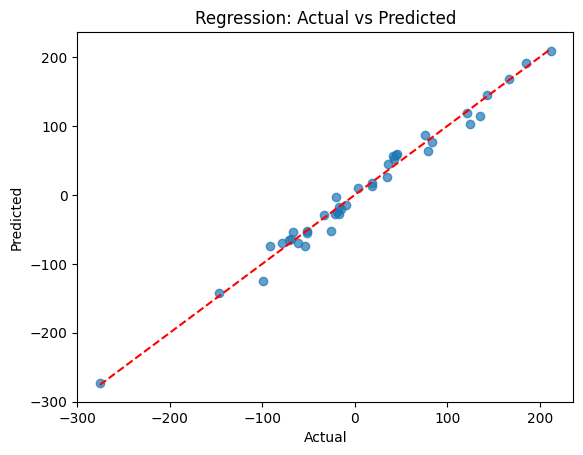

In [6]:
# Example: Linear regression on Boston housing data (deprecated, so we simulate data)
from sklearn.datasets import make_regression
X_reg, y_reg = make_regression(n_samples=200, n_features=3, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluate regression
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## 7. Unsupervised Learning: Clustering

Clustering groups similar data points together without labels. Example: Customer segmentation.

**Real-life use case:** Grouping customers by purchasing behavior for targeted marketing.

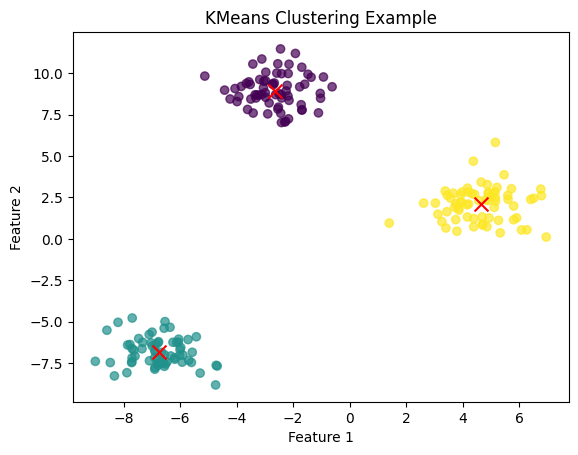

In [7]:
# Example: KMeans clustering
X_blobs, y_blobs = make_blobs(n_samples=200, centers=3, n_features=2, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_blobs)

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.title('KMeans Clustering Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 8. Model Evaluation and Metrics

Evaluating model performance is crucial. Common metrics include accuracy, precision, recall, F1-score (for classification), and mean squared error (for regression).

**Real-life use case:** Comparing different models to select the best one for predicting loan defaults.

In [11]:
# Example: Compare Decision Tree and Logistic Regression on Iris
# First, we need to use the Iris dataset variables, not the regression ones
X_iris = X_scaled  # Scaled feature data from iris dataset
y_iris = df['target']  # Target variable (iris species)
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_iris_train, y_iris_train)
y_pred_dt = dt.predict(X_iris_test)

# Train the logistic regression classifier on the same data
clf_iris = LogisticRegression(max_iter=200)
clf_iris.fit(X_iris_train, y_iris_train)
y_pred_iris = clf_iris.predict(X_iris_test)

# Compare with the logistic regression results
print('Decision Tree Accuracy:', accuracy_score(y_iris_test, y_pred_dt))
print('Logistic Regression Accuracy:', accuracy_score(y_iris_test, y_pred_iris))

Decision Tree Accuracy: 1.0
Logistic Regression Accuracy: 1.0


## 9. Real-Life Use Cases

- **Healthcare:** Predicting disease risk from patient data
- **Finance:** Detecting fraudulent transactions
- **Retail:** Recommending products to customers
- **Transportation:** Predicting traffic congestion
- **Agriculture:** Forecasting crop yields using weather and soil data

## Practice Exercises

1. Try a different classifier (e.g., DecisionTree, SVC) on the Iris dataset and compare results.
2. Use a real dataset (e.g., from UCI or Kaggle) and build a regression model.
3. Perform clustering on a dataset of your choice and visualize the clusters.
4. Experiment with feature scaling and observe its effect on model performance.
5. Explore model evaluation metrics beyond accuracy (e.g., ROC-AUC, confusion matrix).